# Capstone Project 2

## Wrangling Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning
import statsmodels.formula.api as smf
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from gensim.sklearn_api import W2VTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.tokenize import word_tokenize
from gensim.sklearn_api import W2VTransformer
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
import collections
import nltk

In [2]:
# Load dataset
bgg_review=pd.read_csv('bgg_review.csv')
bgg_review = shuffle(bgg_review).reset_index(drop=True)

In [3]:
print(bgg_review.shape)
#bgg_review['review'] = bgg_review['review'].apply(lambda x: "'" + str(x) + "'")
bgg_review

(304910, 13)


,id,name,year,min_play,max_play,min_time,max_time,min_age,category,nb_rate,username,review,rate
0,3076,Puerto Rico,2002,3,5,90,150,12,City Building,57362,rri1,A great game that I think got a bit overplayed...,8.00
1,167791,Terraforming Mars,2016,1,5,120,120,12,Economic,42616,Cutieomancer,One of my favorite card/placement games. Rea...,9.00
2,68448,7 Wonders,2010,2,7,30,30,10,Ancient,70971,ryansdavis,I think I've gradually gotten better. The exp...,9.00
3,9209,Ticket to Ride,2004,2,5,30,60,8,Trains,61798,JediPearce,This is the iOS version.,7.00
4,34635,Stone Age,2008,2,4,60,90,10,Dice,39160,anjulka,Enjoyable game. It also got a number of plays...,8.00
5,40692,Small World,2009,2,5,40,80,8,Fantasy,54626,Darkmot,"It's a world of slaughter, a world of tears\r\...",7.00
6,9209,Ticket to Ride,2004,2,5,30,60,8,Trains,61798,Searchonomicon,A light quick game that is a lot of fun for br...,8.00
7,822,Carcassonne,2000,2,5,30,45,8,City Building,86933,Fried Egg,[b]Recommended player count: 2-4[/b]\r\r\r\n\r...,7.50
8,39856,Dixit,2008,3,6,30,30,8,Card Game,42650,jorgeluispena,I got my 75 year old mother in law to play it ...,8.00
9,1927,Munchkin,2001,3,6,60,120,10,Card Game,36773,kinglink,Fun Expansion but gets hard to deal with the b...,8.00


In [4]:
# Filtering dataset by removing the NaN Values from the 'review' column
bgg_review=bgg_review[bgg_review['review'].notnull()]

In [5]:
bgg_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304864 entries, 0 to 304909
Data columns (total 13 columns):
id          304864 non-null int64
name        304864 non-null object
year        304864 non-null int64
min_play    304864 non-null int64
max_play    304864 non-null int64
min_time    304864 non-null int64
max_time    304864 non-null int64
min_age     304864 non-null int64
category    304864 non-null object
nb_rate     304864 non-null int64
username    304864 non-null object
review      304864 non-null object
rate        304864 non-null float64
dtypes: float64(1), int64(8), object(4)
memory usage: 32.6+ MB


In [6]:
# Description
n_reviews = len(bgg_review)
n_boardgames = bgg_review.name.unique().size

print("Number of reviews: {:d}".format(n_reviews))
print("Number of boardgames:  {:d}".format(n_boardgames))

Number of reviews: 304864
Number of boardgames:  50


## DataStorytelling

### Rate Histogram

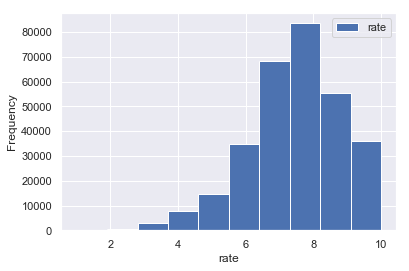

In [7]:
sns.set()
bgg_review.plot(y='rate',kind='hist')
plt.xlabel('rate')
plt.show()

### Games Dataset

In [7]:
bgg_game=bgg_review.groupby(['name','year','min_play','max_play','min_time','max_time','min_age','category',
                             'nb_rate'])[['rate']].mean()
bgg_game=bgg_game.reset_index()
print(bgg_game.shape)
bgg_game

(50, 10)


,name,year,min_play,max_play,min_time,max_time,min_age,category,nb_rate,rate
0,7 Wonders,2010,2,7,30,30,10,Ancient,70971,7.775634
1,7 Wonders Duel,2015,2,2,30,30,10,Ancient,43101,8.183666
2,Agricola,2007,1,5,30,150,12,Animals,57976,8.022455
3,Arkham Horror,2005,1,8,120,360,12,Adventure,34691,7.240847
4,Azul,2017,2,4,30,45,8,Abstract Strategy,32311,8.054097
5,Battlestar Galactica: The Board Game,2008,3,6,120,180,14,Bluffing,30364,7.783193
6,Betrayal at House on the Hill,2004,3,6,60,60,12,Adventure,31443,6.942443
7,Blood Rage,2015,2,4,60,90,14,Fantasy,26905,8.141823
8,Bohnanza,1997,2,7,45,45,13,Card Game,34440,7.222335
9,Carcassonne,2000,2,5,30,45,8,City Building,86933,7.458637


### Histogram Games Dataset

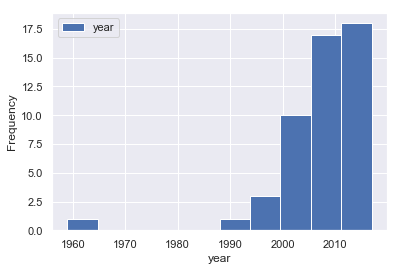

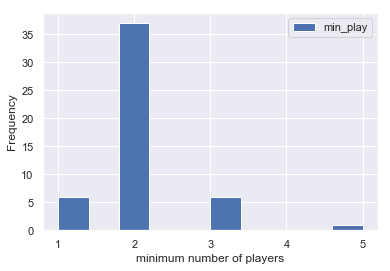

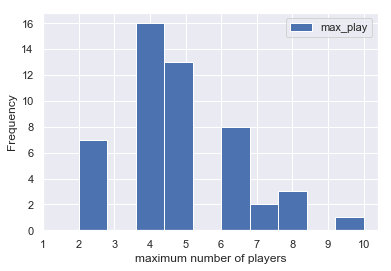

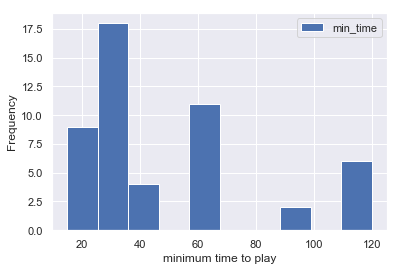

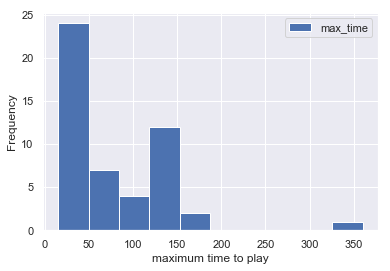

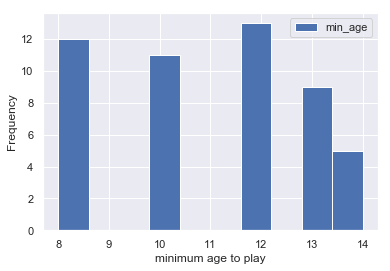

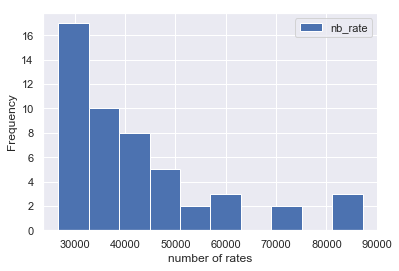

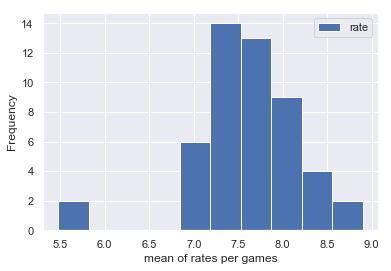

In [9]:
sns.set()
bgg_game.plot(y='year',kind='hist')
plt.xlabel('year')
plt.show()

bgg_game.plot(y='min_play',kind='hist')
plt.xlabel('minimum number of players')
Max1=bgg_game.min_play.max()
plt.xticks(range(1,Max1+1))
plt.show()

bgg_game.plot(y='max_play',kind='hist')
plt.xlabel('maximum number of players')
Max2=bgg_game.max_play.max()
plt.xticks(range(1,Max2+1))
plt.show()

bgg_game.plot(y='min_time',kind='hist')
plt.xlabel('minimum time to play')
plt.show()

bgg_game.plot(y='max_time',kind='hist')
plt.xlabel('maximum time to play')
plt.show()

bgg_game.plot(y='min_age',kind='hist')
plt.xlabel('minimum age to play')
plt.show()

bgg_game.plot(y='nb_rate',kind='hist')
plt.xlabel('number of rates')
plt.show()

bgg_game.plot(y='rate',kind='hist')
plt.xlabel('mean of rates per games')
plt.show()

### Scatter plot Games Dataset

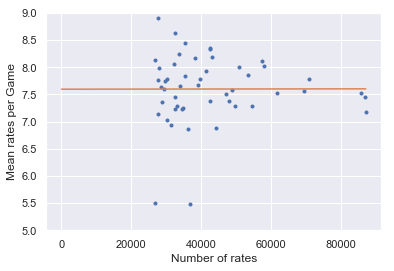

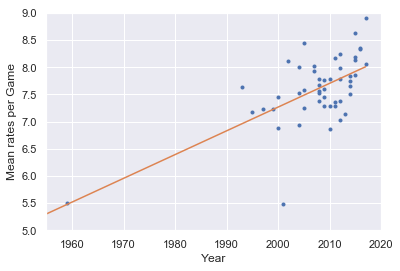

In [15]:
sns.set()
Y=bgg_game.rate
X=bgg_game.nb_rate
# Linear Regression Line
slope,intercept=np.polyfit(X,Y,1)
x=np.array([0,max(X)])
y=slope*x+intercept
# Plot
_=plt.plot(X,Y,marker='.',linestyle='none')
_=plt.plot(x,y)
_=plt.ylim(5,9)
_=plt.ylabel('Mean rates per Game')
_=plt.xlabel('Number of rates')
plt.show()

Y=bgg_game.rate
X=bgg_game.year
# Linear Regression Line
slope,intercept=np.polyfit(X,Y,1)
x=np.array([0,max(X)])
y=slope*x+intercept
# Plot
_=plt.plot(X,Y,marker='.',linestyle='none')
_=plt.plot(x,y)
_=plt.ylim(5,9)
_=plt.xlim(1955,2020)
_=plt.ylabel('Mean rates per Game')
_=plt.xlabel('Year')
plt.show()

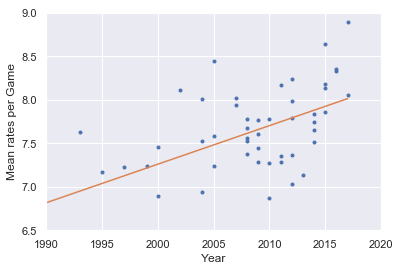

In [25]:
# Without outlier game produced in before 1960
Y=bgg_game.rate[bgg_game.year>1990]
X=bgg_game.year[bgg_game.year>1990]
# Linear Regression Line
slope,intercept=np.polyfit(X,Y,1)
x=np.array([0,max(X)])
y=slope*x+intercept
# Plot
_=plt.plot(X,Y,marker='.',linestyle='none')
_=plt.plot(x,y)
_=plt.ylim(6.5,9)
_=plt.xlim(1990,2020)
_=plt.ylabel('Mean rates per Game')
_=plt.xlabel('Year')
plt.show()

## Exploratory Data Analysis

### Statsmodel

In [11]:
results = smf.ols('rate ~ year + min_play + max_play + min_time + max_time + min_age + nb_rate', data=bgg_game).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     10.48
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.56e-07
Time:                        11:25:49   Log-Likelihood:                -21.989
No. Observations:                  50   AIC:                             59.98
Df Residuals:                      42   BIC:                             75.27
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -79.2237     14.211     -5.575      0.0

## Natural Language Processing

### Text Pre processing

In [7]:
nltk.download('stopwords')
nltk.download('punkt') 
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Diane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Diane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Diane\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
df_tk=bgg_review.copy()

# Lower case
df_tk['review'] = df_tk['review'].str.lower()

# Tokenization
def identify_tokens(row):
    review = row['review']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df_tk['review'] = df_tk.apply(identify_tokens,axis=1)

In [9]:
# Lemmatizer
wnl = WordNetLemmatizer()
def lemmatize(row):
    my_list=row['review']
    lem = [wnl.lemmatize(word) for word in my_list]
    return (lem)

df_tk['review'] = df_tk.apply(lemmatize,axis=1)

In [10]:
# Removing stop words
stops = set(stopwords.words("english"))                  

def remove_stops(row):
    my_list = row['review']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

df_tk['review'] = df_tk.apply(remove_stops,axis=1)

In [11]:
#df_tk1=df_tk.copy()
df_tk['review'] = df_tk.review.apply(', '.join)
df_tk.head()

,id,name,year,min_play,max_play,min_time,max_time,min_age,category,nb_rate,username,review,rate
0,3076,Puerto Rico,2002,3,5,90,150,12,City Building,57362,rri1,"great, game, think, got, bit, overplayed, poin...",8.0
1,167791,Terraforming Mars,2016,1,5,120,120,12,Economic,42616,Cutieomancer,"one, favorite, game, really, accessible, lot, ...",9.0
2,68448,7 Wonders,2010,2,7,30,30,10,Ancient,70971,ryansdavis,"think, gradually, gotten, better, expansion, s...",9.0
3,9209,Ticket to Ride,2004,2,5,30,60,8,Trains,61798,JediPearce,"io, version",7.0
4,34635,Stone Age,2008,2,4,60,90,10,Dice,39160,anjulka,"enjoyable, game, also, got, number, play",8.0


### Dataframe sample for costly operations 

In [12]:
sample_df_tk = df_tk.sample(n=round(len(df_tk)/100))
sample_df_tk.shape

(3049, 13)

In [13]:
sample_df_tk_10 = df_tk.sample(n=round(len(df_tk)/10))
sample_df_tk_10.shape

(30486, 13)

### Min_df Count (minimum number of documents a word must appear in for it to be included in the vocabulary)

In [31]:
vectorizer = CountVectorizer(min_df=1)
review_vec = vectorizer.fit_transform(df_tk.review)
review_vec = review_vec.tocsc()

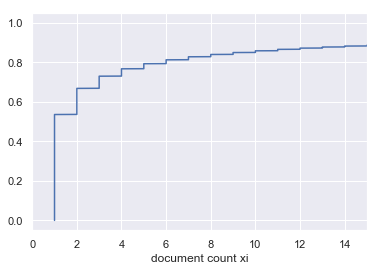

In [32]:
Sum=np.sum(review_vec,axis=0)
Sum=np.array(Sum).flatten()

n_plot=len(Sum)
x_plot=np.sort(Sum)
y_plot=np.arange(1,n_plot+1)/n_plot

sns.set()
plt.plot(x_plot,y_plot)
plt.xlabel('document count xi')
plt.xlim(0,15)
plt.show()

In [14]:
Min_df=2
#Max_df=200

### CountVectorizer()

In [21]:
# Data 'review' transformation
vectorizer = CountVectorizer(min_df=Min_df,stop_words='english').fit(df_tk.review)
review_cou = vectorizer.transform(df_tk.review)

In [22]:
# Get top 15 words
sum_words = review_cou.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:10]

[('game', 350413),
 ('play', 114572),
 ('player', 75105),
 ('card', 58048),
 ('fun', 57970),
 ('like', 54903),
 ('great', 47307),
 ('time', 45451),
 ('good', 45272),
 ('played', 43611)]

In [23]:
# Dimensionality reduction 
svd_cou = TruncatedSVD(n_components=100, random_state=21)
review_cou_svd=svd_cou.fit_transform(review_cou)

In [24]:
# Convertion result into Dataframe
review_cou_svd_matrix=np.matrix(review_cou_svd)
review_cou_svd_df=pd.DataFrame(review_cou_svd_matrix)
print(review_cou_svd_df.shape)
review_cou_svd_df.head()

(304864, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.014803,-0.377454,0.159290,-0.054029,-0.045311,0.020679,-0.123816,-0.093903,0.048005,0.941450,...,-0.150037,-0.071566,0.286200,0.016953,0.037976,0.050616,-0.082762,0.052625,0.023652,-0.029445
1,1.337989,0.718883,0.756919,0.128351,-0.269020,0.060480,-0.032648,0.050328,-0.020863,-0.092415,...,-0.026019,0.047140,-0.012927,0.062589,0.008650,-0.095234,-0.030001,-0.012239,-0.019928,0.072890
2,1.171401,-0.129994,-0.703256,0.037036,-0.508454,0.167642,-0.121580,-0.079973,-0.085264,-0.319855,...,0.032530,-0.047811,0.007720,0.045988,-0.028693,-0.127798,0.014526,-0.073127,-0.032933,-0.056078
3,0.000022,0.000006,0.000052,-0.000001,0.000010,0.000134,0.000028,0.000007,0.000049,0.000019,...,0.000005,0.000160,0.000020,0.000005,0.000003,-0.000225,-0.000169,0.000027,-0.000110,-0.000075
4,5.445683,-0.037815,2.031750,0.604470,-0.600647,0.214143,0.180641,0.696895,0.708377,0.029686,...,0.032214,0.223883,-0.096408,-0.521905,0.181590,-0.242237,-0.222062,0.631651,0.090630,-0.048210


In [25]:
# X and y creation
bgg_review_ = bgg_review.copy()
bgg_review_cou=pd.concat([bgg_review_ , review_cou_svd_df], axis=1)
bgg_review_cou=bgg_review_cou.dropna()
X_cou = bgg_review_cou.drop(['id','category','username','rate','name','review'],axis=1)
y_cou = bgg_review_cou.rate
X_train_cou,X_test_cou,y_train_cou,y_test_cou=train_test_split(X_cou,y_cou,test_size=0.2,random_state=21)

In [26]:
# Without dimensionality reduction
#bgg_review_cou1=pd.concat([bgg_review_ , review_cou], axis=1)
bgg_review_['review']=review_cou
#bgg_review_cou1=bgg_review_cou1.dropna()
X_cou1 = bgg_review_.drop(['id','category','username','rate','name'],axis=1)
y_cou1 = bgg_review_.rate
X_train_cou1,X_test_cou1,y_train_cou1,y_test_cou1=train_test_split(X_cou1,y_cou1,test_size=0.2,random_state=21)

### TfidfVectorizer()

In [27]:
# Data 'review' transformation
tfidfvectorizer = TfidfVectorizer(min_df=Min_df, stop_words='english').fit(df_tk.review)
review_tfi = tfidfvectorizer.transform(df_tk.review)

In [28]:
# Get top 15 words
sum_words = review_tfi.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:10]

[('game', 23859.503314227517),
 ('play', 11727.048291803789),
 ('player', 9573.633907887759),
 ('fun', 8855.913430121478),
 ('great', 7869.1581348086),
 ('good', 7070.137546870263),
 ('like', 6582.839331148265),
 ('played', 6510.4963427119865),
 ('card', 6013.602324412543),
 ('time', 5652.68393174231)]

In [29]:
# Dimensionality reduction 
svd_tfi = TruncatedSVD(n_components=100, random_state=21)
review_tfi_svd=svd_tfi.fit_transform(review_tfi)

In [30]:
# Convertion result into Dataframe
review_tfi_svd_matrix=np.matrix(review_tfi_svd)
review_tfi_svd_df=pd.DataFrame(review_tfi_svd_matrix)
print(review_tfi_svd_df.shape)
review_tfi_svd_df.head()

(304864, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.128829,-0.030160,0.024795,-0.008523,-0.080459,0.142502,0.008558,0.059720,0.019946,-0.015817,...,-0.001911,-0.006874,0.001332,0.002486,0.015714,0.004943,-0.008118,0.002850,-0.005617,0.011194
1,0.116859,0.075778,-0.013049,-0.008697,-0.001241,0.030903,-0.020300,-0.043529,-0.059734,-0.004543,...,0.000545,-0.004062,-0.000037,-0.005700,0.008925,0.012142,-0.009849,-0.021143,-0.014535,-0.020867
2,0.236993,-0.080721,0.147106,0.079054,0.210086,-0.056849,0.055957,0.140517,0.022100,-0.028812,...,0.005255,-0.010847,0.011501,0.001843,0.009478,-0.006507,0.010274,0.000104,-0.001345,-0.004436
3,0.000022,0.000004,0.000014,-0.000014,0.000001,0.000012,-0.000009,-0.000024,-0.000011,-0.000012,...,0.000032,-0.000040,-0.000013,-0.000044,0.000005,-0.000004,-0.000011,-0.000062,-0.000043,-0.000035
4,0.175806,0.058272,0.014267,-0.031116,-0.006695,0.042529,-0.013193,-0.062133,-0.059667,0.027865,...,-0.003961,-0.003060,0.026050,-0.012213,-0.002777,-0.017489,0.043410,-0.028299,0.000220,-0.043931


In [45]:
# X and y creation
bgg_review_ = bgg_review.copy()
bgg_review_tfi=pd.concat([bgg_review_ , review_tfi_svd_df], axis=1)
bgg_review_tfi=bgg_review_tfi.dropna()
X_tfi = bgg_review_tfi.drop(['id','category','username','rate','name','review'],axis=1)
y_tfi = bgg_review_tfi.rate
X_train_tfi,X_test_tfi,y_train_tfi,y_test_tfi = train_test_split(X_tfi,y_tfi,test_size=0.2,random_state=21)

### W2VTransformer()

In [24]:
print(sample_df_tk.review[0:5])

90459     game, fun, quite, flaw, adventure, bit, tweaki...
282628    whilst, game, would, rank, amongst, favourite,...
61412     liked, much, wa, expecting, yes, euro, fantasy...
285452                         fun, game, lot, thing, going
249663    good, game, overall, exytremely, simple, under...
Name: review, dtype: object


In [ ]:
# Data 'review' transformation  
model = W2VTransformer(size=100, min_count=2, seed=21)
review_wor = model.fit_transform(sample_df_tk.review)

C:\Users\Diane\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [ ]:
# Get top 15 words
sum_words = review_wor.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     model.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:10]

In [ ]:
# Convertion result into Dataframe
review_wor_svd_matrix=np.matrix(review_wor)
review_wor_svd_df=pd.DataFrame(review_wor_svd_matrix)
print(review_wor_svd_df.shape)
review_wor_svd_df.head()

In [ ]:
# X and y creation
bgg_review_wor = sample_df_tk.copy()
bgg_review_wor['review_wor'] = review_wor
X_wor = bgg_review_wor.drop(['id','category','username','rate','name','review'],axis=1)
y_wor = bgg_review_wor.rate
X_train_wor , X_test_wor , y_train_wor , y_test_wor = train_test_split(X_wor , y_wor , test_size=0.2 , random_state=21)

## Machine Learning

### Random Forest: best max_depth 
- CountVectorizer()

In [28]:
param_grid={'max_depth':np.arange(1,10)}
regr_cou=RandomForestRegressor(random_state=21)
regr_cou_cv=GridSearchCV(regr_cou,param_grid,cv=5)
regr_cou_cv.fit(X_train_cou,y_train_cou)
print('Best parameter:',regr_cou_cv.best_params_)
print('Best score:',regr_cou_cv.best_score_)

C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

Best parameter: {'max_depth': 9}
Best score: 0.19042325216866424


- TfidfVectorizer()

In [ ]:
param_grid={'max_depth':np.arange(1,10)}
regr_tfi=RandomForestRegressor(random_state=21)
regr_tfi_cv=GridSearchCV(regr_tfi,param_grid,cv=5)
regr_tfi_cv.fit(X_train_tfi,y_train_tfi)
print('Best parameter:',regr_tfi_cv.best_params_)
print('Best score:',regr_tfi_cv.best_score_)

- Word2Vec()

### Random Forest: best min_samples_leaf
- CountVectorizer()

In [24]:
param_grid={'min_samples_leaf':[1,20,50]}
regr_cou=RandomForestRegressor(random_state=21,max_depth=9)
regr_cou_cv=GridSearchCV(regr_cou,param_grid,cv=5)
regr_cou_cv.fit(X_train_cou,y_train_cou)
print('Best parameter:',regr_cou_cv.best_params_)
print('Best score:',regr_cou_cv.best_score_)

C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

Best parameter: {'min_samples_leaf': 50}
Best score: 0.143464527046884


- TfidfVectorizer()

In [25]:
param_grid={'min_samples_leaf':[1,20,50]}
regr_tfi=RandomForestRegressor(random_state=21,max_depth=9)
regr_tfi_cv=GridSearchCV(regr_tfi,param_grid,cv=5)
regr_tfi_cv.fit(X_train_tfi,y_train_tfi)
print('Best parameter:',regr_tfi_cv.best_params_)
print('Best score:',regr_tfi_cv.best_score_)

C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

Best parameter: {'min_samples_leaf': 50}
Best score: 0.14373490434936928


## Pipeline

In [25]:
# X & y creation
X = df_tk.drop(['id','category','username','rate','name'],axis=1)
y = df_tk.rate
# train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

In [26]:
# Sample of the dataset /100
# X & y creation
X_s = sample_df_tk.drop(['id','category','username','rate','name'],axis=1)
y_s = sample_df_tk.rate
# train_test_split
X_train_s,X_test_s,y_train_s,y_test_s=train_test_split(X_s,y_s,test_size=0.2,random_state=21)

In [27]:
# Sample of the dataset /10
# X & y creation
X_s10 = sample_df_tk_10.drop(['id','category','username','rate','name'],axis=1)
y_s10 = sample_df_tk_10.rate
# train_test_split
X_train_s10,X_test_s10,y_train_s10,y_test_s10=train_test_split(X_s10,y_s10,test_size=0.2,random_state=21)

In [28]:
# Select review column
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.field]
# Select other columns
class NumberSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[[self.field]]

### Random Forest
- CountVectorizer()

In [29]:
classifier = Pipeline([
    ('features', FeatureUnion([('column1',NumberSelector('year')),('column2',NumberSelector('min_play')),
                               ('column3',NumberSelector('max_play')),('column4',NumberSelector('min_time')),
                               ('column5',NumberSelector('max_time')),('column6',NumberSelector('min_age')),
                               ('column7',NumberSelector('nb_rate')),
        ('text', Pipeline([
            ('colext', TextSelector('review')),
            ('CountVectorizer', CountVectorizer(min_df=Min_df,stop_words='english')),
            ('svd', TruncatedSVD(n_components=100,random_state=21)),])),])),
    ('clf', RandomForestRegressor(max_depth=9, min_samples_leaf=50, random_state=21)),])
cv_result_cou_RF_pip=cross_val_score(classifier,X_train,y_train,cv=5)
# Score
print(cv_result_cou_RF_pip)
print('CV result mean (CountVectorizer_RadomForest_Pipeline) =',np.mean(cv_result_cou_RF_pip))

C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

[0.2011335  0.19458322 0.19863653 0.2015883  0.20242622]
CV result mean (CountVectorizer_RadomForest_Pipeline) = 0.19967355468287837


In [39]:
# Without svd
classifier = Pipeline([
    ('features', FeatureUnion([('column1',NumberSelector('year')),('column2',NumberSelector('min_play')),
                               ('column3',NumberSelector('max_play')),('column4',NumberSelector('min_time')),
                               ('column5',NumberSelector('max_time')),('column6',NumberSelector('min_age')),
                               ('column7',NumberSelector('nb_rate')),
        ('text', Pipeline([
            ('colext', TextSelector('review')),
            ('CountVectorizer', CountVectorizer(min_df=Min_df,stop_words='english')),])),])),
    ('clf', RandomForestRegressor(max_depth=9, min_samples_leaf=50, random_state=21)),])
cv_result_cou_RF_pip=cross_val_score(classifier,X_train,y_train,cv=5)
# Score
print(cv_result_cou_RF_pip)
print('CV result mean (CountVectorizer_RadomForest_Pipeline) =',np.mean(cv_result_cou_RF_pip))

C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

[0.19513469 0.18714651 0.19202021 0.19400122 0.19556467]
CV result mean (CountVectorizer_RadomForest_Pipeline) = 0.19277345906518842


In [ ]:
#classifier.predict(X_test)

- TfidfVectorizer()

In [31]:
classifier = Pipeline([
    ('features', FeatureUnion([('column1',NumberSelector('year')),('column2',NumberSelector('min_play')),
                               ('column3',NumberSelector('max_play')),('column4',NumberSelector('min_time')),
                               ('column5',NumberSelector('max_time')),('column6',NumberSelector('min_age')),
                               ('column7',NumberSelector('nb_rate')),
        ('text', Pipeline([
            ('colext', TextSelector('review')),
            ('TfidfVectorizer', TfidfVectorizer(min_df=Min_df,stop_words='english')),
            ('svd', TruncatedSVD(n_components=100,random_state=21)),])),])),
    ('clf', RandomForestRegressor(max_depth=9, min_samples_leaf=50, random_state=21)),])
cv_result_tfi_RF_pip=cross_val_score(classifier,X_train,y_train,cv=5)
# Score
print(cv_result_tfi_RF_pip)
print('CV result mean (TfidfVectorizer_RadomForest_Pipeline) =',np.mean(cv_result_tfi_RF_pip))

C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

[0.21245404 0.20810487 0.20967329 0.21468131 0.21297985]
CV result mean (TfidfVectorizer_RadomForest_Pipeline) = 0.2115786712576427


In [40]:
# Without svd
classifier = Pipeline([
    ('features', FeatureUnion([('column1',NumberSelector('year')),('column2',NumberSelector('min_play')),
                               ('column3',NumberSelector('max_play')),('column4',NumberSelector('min_time')),
                               ('column5',NumberSelector('max_time')),('column6',NumberSelector('min_age')),
                               ('column7',NumberSelector('nb_rate')),
        ('text', Pipeline([
            ('colext', TextSelector('review')),
            ('TfidfVectorizer', TfidfVectorizer(min_df=Min_df,stop_words='english')),])),])),
    ('clf', RandomForestRegressor(max_depth=9, min_samples_leaf=50, random_state=21)),])
cv_result_tfi_RF_pip=cross_val_score(classifier,X_train,y_train,cv=5)
# Score
print(cv_result_tfi_RF_pip)
print('CV result mean (TfidfVectorizer_RadomForest_Pipeline) =',np.mean(cv_result_tfi_RF_pip))

C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

[0.19671075 0.18658406 0.19237503 0.19733374 0.1959909 ]
CV result mean (TfidfVectorizer_RadomForest_Pipeline) = 0.19379889513667453


- Word2Vec()

In [30]:
X_train.head()

,year,min_play,max_play,min_time,max_time,min_age,nb_rate,review
283641,2000,2,5,30,45,8,86933,"good, even, year, old, kid"
281992,2007,2,4,30,60,12,41382,"could, never, really, get, game, due, symbolog..."
29125,2012,2,5,60,120,12,39685,"perfect, game, lighter, side, affair, right, a..."
156379,2007,1,5,30,150,12,57976,"wife, wa, totally, uninterested, first, ha, ru..."
270542,2008,2,4,60,90,10,39160,"love, theme, really, ha, nothing, mechanic, pr..."


In [44]:
classifier = Pipeline([
    ('features', FeatureUnion([('column1',NumberSelector('year')),('column2',NumberSelector('min_play')),
                               ('column3',NumberSelector('max_play')),('column4',NumberSelector('min_time')),
                               ('column5',NumberSelector('max_time')),('column6',NumberSelector('min_age')),
                               ('column7',NumberSelector('nb_rate')),
        ('text', Pipeline([
            ('colext', TextSelector('review')),
            ('Word2Vec', W2VTransformer(size=100, min_count=2, seed=21)),])),])),
    ('clf', RandomForestRegressor(max_depth=9, random_state=21)),])
cv_result_wor_RF_pip=cross_val_score(classifier,X_train_s,y_train_s,cv=5)
# Score
print(cv_result_wor_RF_pip)
print('CV result mean (Word2Vec_RadomForest_Pipeline) =',np.mean(cv_result_wor_RF_pip))

C:\Users\Diane\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


KeyError: "word 'one, keep, eternity, collection' not in vocabulary"

### Support Vector Regression
- CountVectorizer()

In [31]:
# With dataframe sample /10
classifier = Pipeline([
    ('features', FeatureUnion([('column1',NumberSelector('year')),('column2',NumberSelector('min_play')),
                               ('column3',NumberSelector('max_play')),('column4',NumberSelector('min_time')),
                               ('column5',NumberSelector('max_time')),('column6',NumberSelector('min_age')),
                               ('column7',NumberSelector('nb_rate')),
        ('text', Pipeline([
            ('colext', TextSelector('review')),
            ('CountVectorizer', CountVectorizer(min_df=Min_df,stop_words='english')),
            ('svd', TruncatedSVD(n_components=100,random_state=21)),])),])),
    ('svr', SVR()),])
cv_result_cou_SVR_pip=cross_val_score(classifier,X_train_s10,y_train_s10,cv=5)
# Score
print(cv_result_cou_SVR_pip)
print('CV result mean (CountVectorizer_SVR_Pipeline) =',np.mean(cv_result_cou_SVR_pip))

C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[0.17947435 0.15856433 0.16888577 0.15803012 0.15889955]
CV result mean (CountVectorizer_SVR_Pipeline) = 0.16477082310679855


- TfidfVectorizer()

In [32]:
# With dataframe sample /10
classifier = Pipeline([
    ('features', FeatureUnion([('column1',NumberSelector('year')),('column2',NumberSelector('min_play')),
                               ('column3',NumberSelector('max_play')),('column4',NumberSelector('min_time')),
                               ('column5',NumberSelector('max_time')),('column6',NumberSelector('min_age')),
                               ('column7',NumberSelector('nb_rate')),
        ('text', Pipeline([
            ('colext', TextSelector('review')),
            ('TfidfVectorizer', TfidfVectorizer(min_df=Min_df,stop_words='english')),
            ('svd', TruncatedSVD(n_components=100,random_state=21)),])),])),
    ('svr', SVR()),])
cv_result_tfi_SVR_pip=cross_val_score(classifier,X_train_s10,y_train_s10,cv=5)
# Score
print(cv_result_tfi_SVR_pip)
print('CV result mean (TfidfVectorizer_SVR_Pipeline) =',np.mean(cv_result_tfi_SVR_pip))

C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Diane\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[0.14300085 0.11787558 0.12041696 0.12250922 0.12361266]
CV result mean (TfidfVectorizer_SVR_Pipeline) = 0.12548305170836058


- Word2Vec()

In [ ]:
classifier = Pipeline([
    ('features', FeatureUnion([('column1',NumberSelector('year')),('column2',NumberSelector('min_play')),
                               ('column3',NumberSelector('max_play')),('column4',NumberSelector('min_time')),
                               ('column5',NumberSelector('max_time')),('column6',NumberSelector('min_age')),
                               ('column7',NumberSelector('nb_rate')),
        ('text', Pipeline([
            ('colext', TextSelector('review')),
            ('Word2Vec', W2VTransformer(size=100, min_count=2, seed=21)),
            ('svd', TruncatedSVD(n_components=100,random_state=21)),])),])),
    ('svr', SVR()),])
cv_result_wor_SVR_pip=cross_val_score(classifier,X_train_s,y_train_s,cv=5)
# Score
print(cv_result_wor_SVR_pip)
print('CV result mean (Word2Vec_SVR_Pipeline) =',np.mean(cv_result_wor_SVR_pip))